<a href="https://colab.research.google.com/github/sahanediriweera/EE7204ComputerVisionAndImageProcessing/blob/main/Image_Processing_Take_Home_Assignment_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

class RegionGrower:
    def __init__(self, img):
        self.img = img
        self.gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        self.mask = np.zeros_like(self.gray)
        self.seeds = []
        self.threshold = 5
        self.neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)]

    def add_seed(self, seed):
        self.seeds.append(seed)

    def set_threshold(self, threshold):
        self.threshold = threshold

    def set_neighbors(self, neighbors):
        self.neighbors = neighbors

    def region_grow(self):
        for seed in self.seeds:
            self.mask[seed[0], seed[1]] = 1
        for seed in self.seeds:
            for neighbor in self.neighbors:
                x, y = seed[0] + neighbor[0], seed[1] + neighbor[1]
                if x < 0 or x >= self.gray.shape[0] or y < 0 or y >= self.gray.shape[1]:
                    continue
                if self.mask[x, y] != 0:
                    continue
                if np.all(np.abs(self.img[x, y] - self.img[seed[0], seed[1]]) <= self.threshold):
                    self.mask[x, y] = 1
                    self.seeds.append((x, y))

    def get_mask(self):
        return self.mask

In [40]:
def region_grow_segmentation(img, seeds, threshold=50, neighbors=[(0,1),(0,-1),(1,0),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)]):
    rg = RegionGrower(img)
    for seed in seeds:
        rg.add_seed(seed)
    rg.set_threshold(threshold)
    rg.set_neighbors(neighbors)
    rg.region_grow()
    return rg.get_mask()

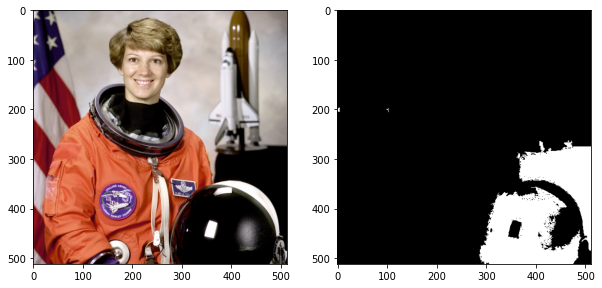

In [41]:
img = data.astronaut()
seeds = [(200, 0),(300,500),(400,350),(200,100)]
neighbors=[(0,1),(0,-1),(1,0),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)]
mask = region_grow_segmentation(img, seeds, threshold=20)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[1].imshow(mask, cmap='gray')
plt.show()